#### Imports & Installations

In [ ]:
# Dependencies
!pip install ultralytics
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


In [ ]:
from ultralytics import YOLO
import glob
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

numpy               ✅ 1.26.4<2.0.0,>=1.23.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.4.0+cu121>=1.8.0
torchvision         ✅ 0.19.0+cu121>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.1.4>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.6>=2.0.0
torch               ✅ 2.4.0+cu121!=2.4.0,>=1.8.0; sys_platform == "win32"


#### Getting Data Ready

In [ ]:
from getpass import getpass
ROBOFLOW_API_KEY = getpass('Enter ROBOFLOW_API_KEY secret value: ')

Enter ROBOFLOW_API_KEY secret value: ··········


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("ember-mywak").project("fire-wfnjp")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.91, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fire-1 in yolov8:: 100%|██████████| 25406/25406 [00:06<00:00, 3674.10it/s]


#### Model Training

In [ ]:
# !rm -rf /content/runs

In [ ]:
!yolo task= detect mode= train model= yolov8m.pt data= {dataset.location}/data.yaml epochs= 10 imgsz= 640

100% 49.7M/49.7M [00:00<00:00, 356MB/s]
Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Fire-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

#### Confusion Matrix

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width= 600)

#### Graphs

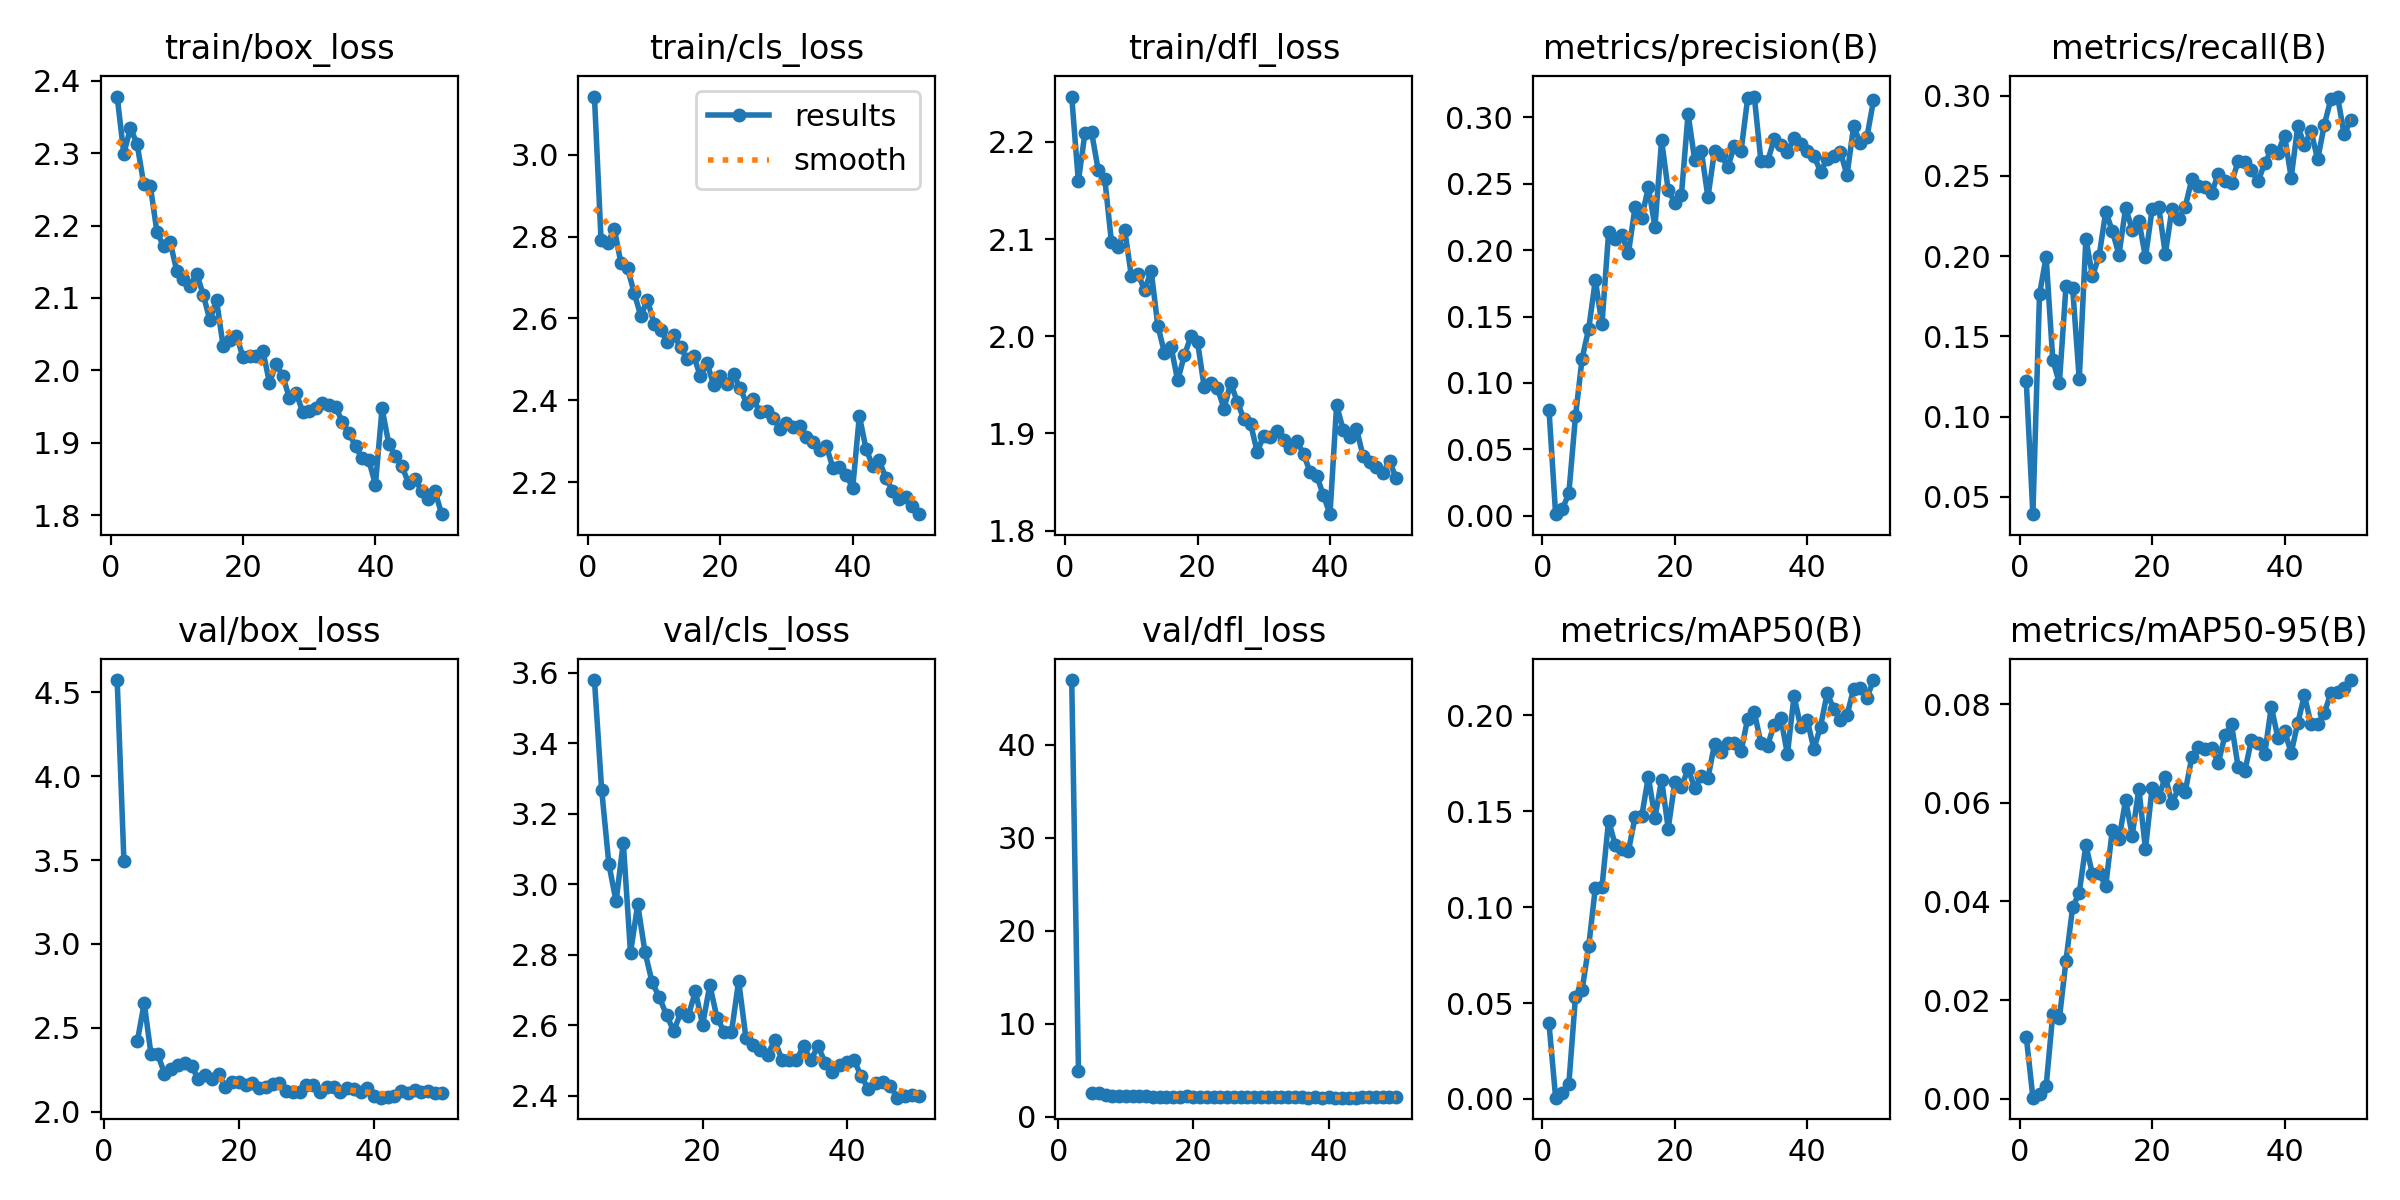

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width= 600)

#### Validation

In [ ]:
!yolo task= detect mode=predict model="/content/runs/detect/train/weights/best.pt" data= {dataset.location}/data.yaml

WARNING ⚠️ 'source' argument is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 2 fires, 104.0ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 1 fire, 8 smokes, 44.2ms
Speed: 4.2ms preprocess, 74.1ms inference, 446.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


#### Prediction

In [ ]:
!yolo task= detect mode=val model="/content/runs/detect/train/weights/best.pt" data= {dataset.location}/data.yaml

Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/forest-fire-detection-1/valid/labels.cache... 154 images, 1 backgrounds, 0 corrupt: 100% 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:09<00:00,  1.10it/s]
                   all        154       1045      0.313      0.284      0.218     0.0845
                  fire        146        520      0.282      0.356       0.25      0.105
                 smoke        125        525      0.343      0.211      0.187     0.0637
Speed: 5.0ms preprocess, 23.6ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
import glob
for image_path in glob.glob(f"/content/runs/detect/train/predict/*.jpg"):
  display(Image(filename= image_path, height= 600))
  print("\n")

##### Download the model

In [ ]:
!yolo export model=yolov8n.pt format=torchscript

In [ ]:
import torch
from ultralytics import YOLO

# Assuming `model` is your fine-tuned YOLO model
model_path = '/content/yolov8_finetuned.pt'
torch.save(model, model_path)

['.config', 'abc.jpg', 'efficientNet_fire_classifier.h5', 'yolov8_finetuned.pt', 'yolov8m.pt', 'runs', '.ipynb_checkpoints', 'Object-Detection-Transformer-2', 'yolov8n.pt', 'sample_data']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Path to the file you want to download
file_path = '/content/yolov8n.torchscript'

# Download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Combining Efficient Net & Yolo

##### Load Trained EfficientNet

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import load_model
# Load the EfficientNet B0 model with custom_objects
model_path = '/content/efficientNet_fire_classifier.h5'
efficientnet_model = load_model(model_path, custom_objects={'KerasLayer': hub.KerasLayer})

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7cd34e5956f0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

##### Load Trained YOLOv8

In [ ]:
import torch
from ultralytics import YOLO

# Load the YOLOv8 model
yolov8_model_path = '/content/yolov8m.pt'
yolov8_model = YOLO(yolov8_model_path)

#### Inference

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Class labels for the EfficientNet model
class_labels = ['nofire', 'smoke', 'fire']

def preprocess_image(img_path):
    """Preprocess the image for EfficientNet."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    return img_array

def classify_image(model, img_array):
    """Classify the image using EfficientNet."""
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=-1)
    return predicted_class, predictions

def filter_and_detect(efficientnet_model, yolov8_model, img_paths):
    """Filter images using EfficientNet and detect objects using YOLOv8."""
    for img_path in img_paths:
        # Preprocess the image
        img_array = preprocess_image(img_path)

        # Classify the image
        predicted_class, _ = classify_image(efficientnet_model, img_array)
        class_label = class_labels[predicted_class[0]]

        # If the image is classified as "fire" or "smoke", forward it to YOLOv8
        if class_label in ['smoke', 'fire']:
            # Load the image for YOLOv8
            img = image.load_img(img_path)
            img_array = image.img_to_array(img)

            # Run YOLOv8 detection
            results = yolov8_model(img_array)

            # Process and display results (customize as needed)
            results.show()
            print(f"Detected objects in {img_path}: {results}")
        else:
            print(f"Image {img_path} classified as 'nofire', skipping detection.")

In [ ]:
# List of image paths to process
img_paths = [
    '/path/to/image1.jpg',
    '/path/to/image2.jpg',
    '/path/to/image3.jpg',
    # Add more image paths as needed
]

# Run the filtering and detection function
filter_and_detect(efficientnet_model, yolov8_model, img_paths)